## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv ('23- Marker_Segmentation.csv')

data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Visualize the data

Text(0, 0.5, 'Loyalty')

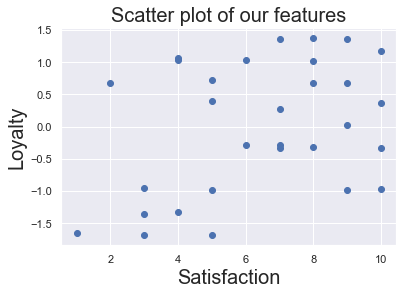

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])

plt.title('Scatter plot of our features', size=20)

plt.xlabel('Satisfaction', size=20)

plt.ylabel('Loyalty', size=20)

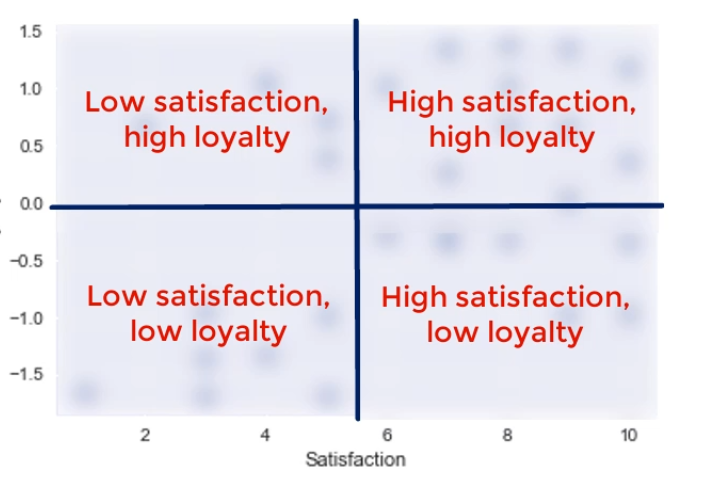

## Select the features

## Clustering

In [8]:
x = data.copy()

kmeans = KMeans(4)

kmeans.fit(x)

KMeans(n_clusters=4)

## Results

In [9]:
clusters = x.copy()

clusters['cluster_pred']=kmeans.fit_predict(x)

clusters.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,3
2,5,-0.99,3
3,7,-0.29,2
4,4,1.06,3


Text(0, 0.5, 'Loyalty')

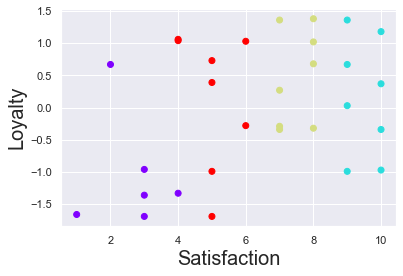

In [10]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'],
            c=clusters['cluster_pred'], cmap='rainbow')

plt.xlabel('Satisfaction', size=20)
plt.ylabel('Loyalty', size=20)

## Standardize the variables

In [12]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)

x_scaled = pd.DataFrame(x_scaled, columns=['Satisfaction_scaled', 'Loyalty_scaled'])
x_scaled.head()

,Satisfaction_scaled,Loyalty_scaled
0,-0.931381,-1.331811
1,-0.155230,-0.281171
2,-0.543305,-0.991604
3,0.232845,-0.291177
4,-0.931381,1.059645


In [16]:
kmeans2 = KMeans(3)

kmeans2.fit(x_scaled)

KMeans(n_clusters=3)

In [17]:
new_x_scaled = x_scaled.copy()

new_x_scaled['cluster_pred_scaled'] = kmeans2.fit_predict(x_scaled)

new_x_scaled.head()

,Satisfaction_scaled,Loyalty_scaled,cluster_pred_scaled
0,-0.931381,-1.331811,2
1,-0.155230,-0.281171,1
2,-0.543305,-0.991604,2
3,0.232845,-0.291177,1
4,-0.931381,1.059645,0


Text(0, 0.5, 'Loyalty_scaled')

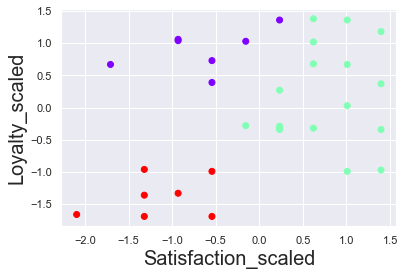

In [18]:
plt.scatter(new_x_scaled['Satisfaction_scaled'], new_x_scaled['Loyalty_scaled'],
            c=new_x_scaled['cluster_pred_scaled'], cmap='rainbow')

plt.xlabel('Satisfaction_scaled', size=20)
plt.ylabel('Loyalty_scaled', size=20)

## Applying the `Elbow method`

In [20]:
wcss =[]

for i in range(1,10):
 
    kmeans = KMeans(i)
   
    kmeans.fit(x_scaled)

    wcss.append(kmeans.inertia_)

wcss= pd.DataFrame(wcss, columns = ['WCSS'])
wcss

,WCSS
0,60.000000
1,29.818973
2,17.913350
3,10.247182
4,7.792695
5,6.549837
6,5.326631
7,4.387790
8,3.821727


Text(0, 0.5, 'WCSS')

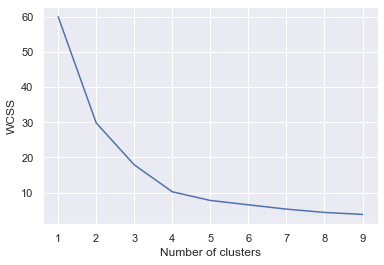

In [21]:
plt.plot(range(1,10),wcss)

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Selecting the number of clusters

In [25]:
kmeans_new = KMeans(4)

kmeans_new.fit(x_scaled)

clusters_new = x.copy()

clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [26]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

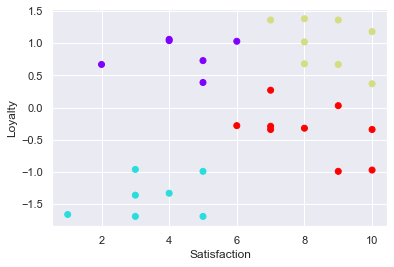

In [27]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'], 
            c=clusters_new['cluster_pred'],cmap='rainbow')

plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

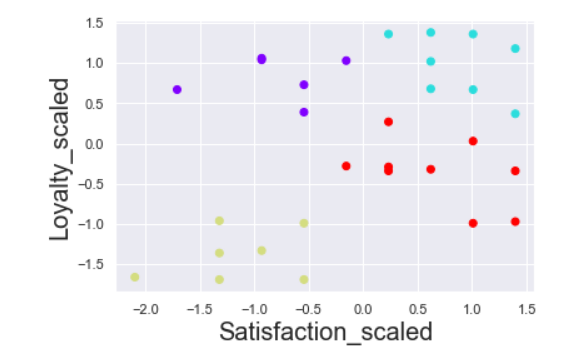

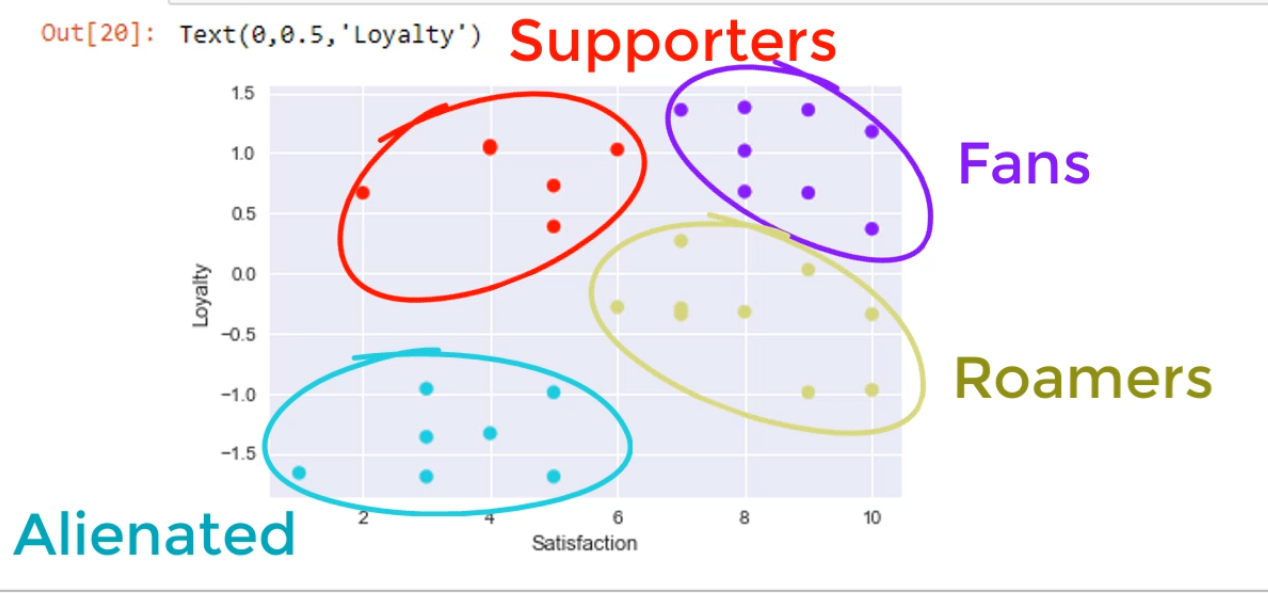

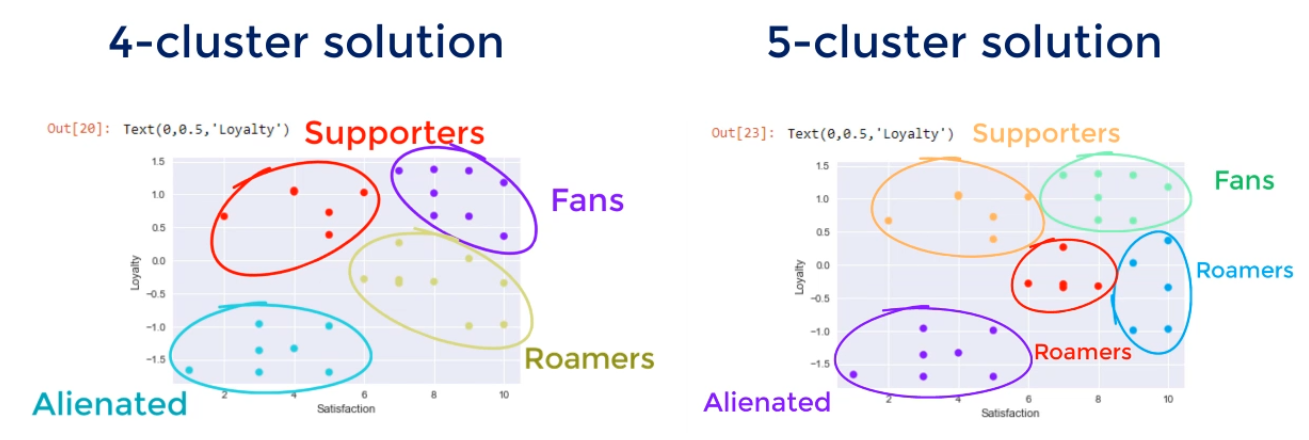

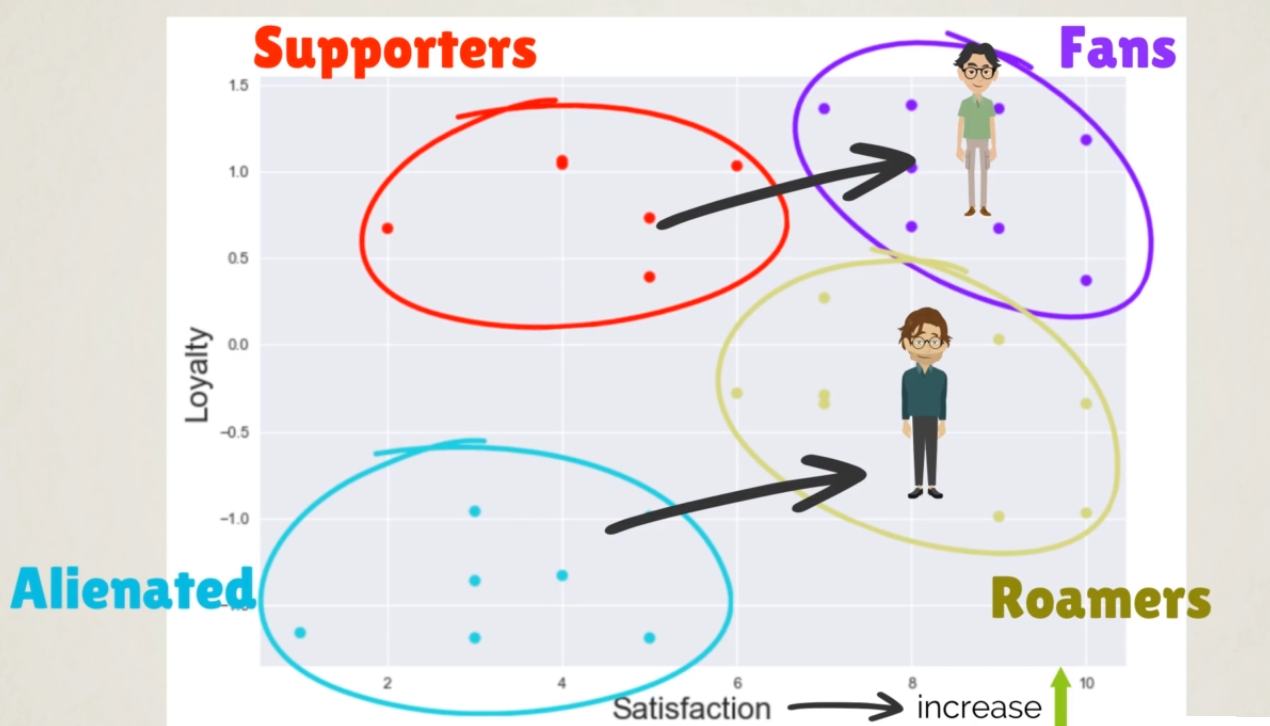